In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('../data//df_with_features_descriptors_and_bacteria.csv')

In [3]:
columns_drop = ['SMILES', 'bacteria', 'S. aureus']
df_ready = df.drop(columns=columns_drop)

In [4]:
# Разделение данных на признаки и целевую переменную
X = df_ready.drop(columns=['MIC (µmol/mL)'])  
y = df_ready['MIC (µmol/mL)'] 

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Используем линейную регрессию
model = LinearRegression()

# Обучаем модель
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")


Mean Squared Error: 0.009274140012029574
R²: 0.9235816729863024


In [5]:
# Функция для настройки общего оформления графиков
def configure_plot(title, xlabel, ylabel=None):
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

# Функция для создания scatter-плота
def plot_scatter(x, y, xlabel, ylabel, title, line=True):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.7, color='b')
    if line:
        plt.plot([min(x), max(x)], [min(x), max(x)], color='red', lw=2)  # Линия для идеальных значений
    configure_plot(title, xlabel, ylabel)
    plt.show()

# Функция для создания гистограммы с вертикальной линией
def plot_histogram(data, xlabel, ylabel, title, bins=30, line_at_zero=True):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, alpha=0.7, color='b')
    if line_at_zero:
        plt.axvline(x=0, color='red', linestyle='--', lw=2)
    configure_plot(title, xlabel, ylabel)
    plt.show()

# Функция для построения Q-Q графика
def plot_qq(data, title):
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    configure_plot(title, xlabel="Theoretical Quantiles")
    plt.show()

# Функция для KDE плотности
def plot_kde(data1, data2, label1, label2, xlabel, title):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data1, label=label1, color='b')
    sns.kdeplot(data2, label=label2, color='r')
    configure_plot(title, xlabel)
    plt.legend()
    plt.show()




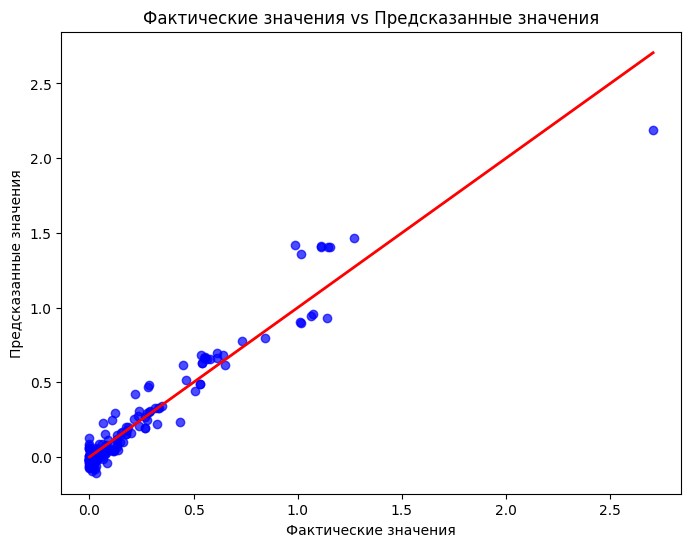

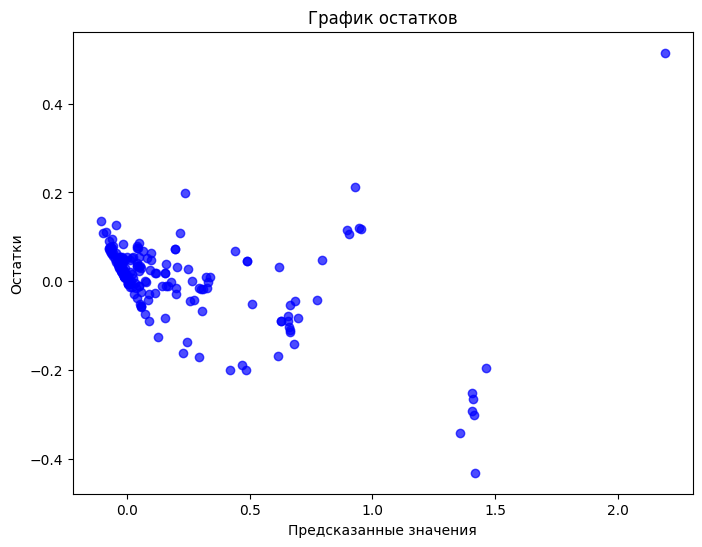

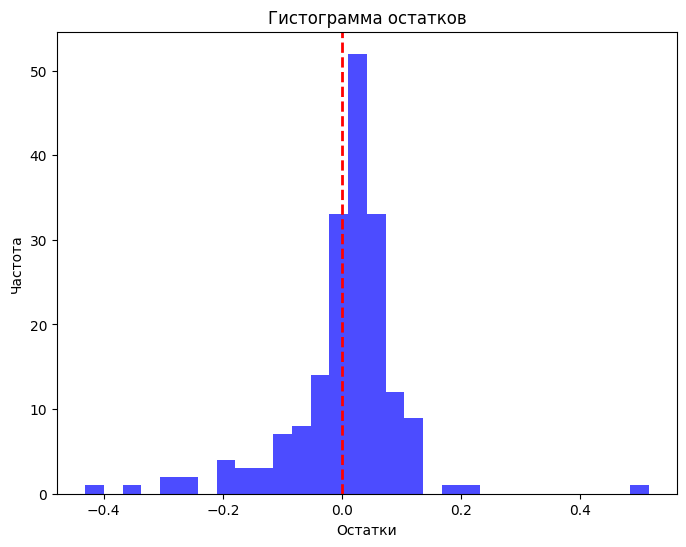

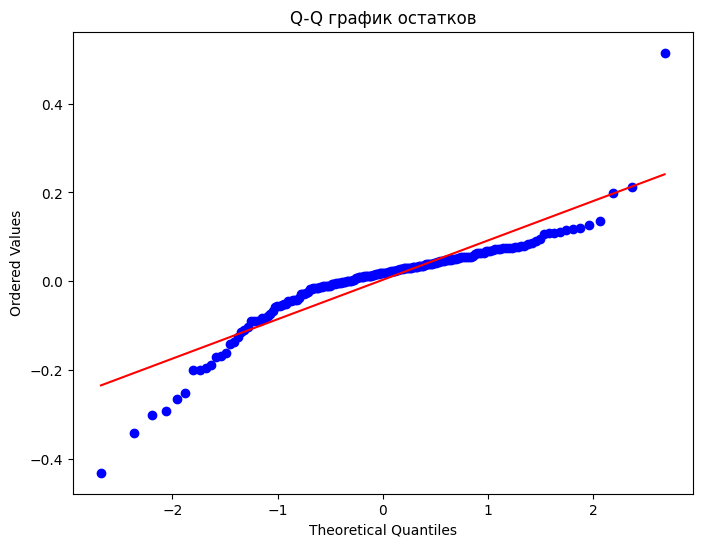

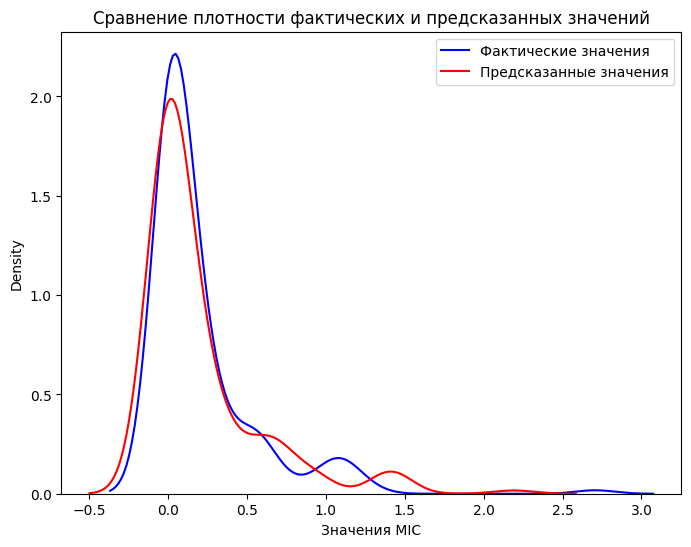

In [6]:
residuals = y_test - y_pred  # Остатки

# 1. Фактические значения vs Предсказанные значения
plot_scatter(y_test, y_pred, 'Фактические значения', 'Предсказанные значения', 'Фактические значения vs Предсказанные значения')

# 2. График остатков
plot_scatter(y_pred, residuals, 'Предсказанные значения', 'Остатки', 'График остатков', line=False)

# 3. Гистограмма остатков
plot_histogram(residuals, 'Остатки', 'Частота', 'Гистограмма остатков')

# 4. Q-Q график
plot_qq(residuals, 'Q-Q график остатков')

# 5. Плотность предсказанных и фактических значений
plot_kde(y_test, y_pred, 'Фактические значения', 'Предсказанные значения', 'Значения MIC', 'Сравнение плотности фактических и предсказанных значений')